Necessary Libraries import,
Numpy, pandas, matplotlib, tensorflow and sklearn

Libraries Description:
- numpy library is used for scientific computing such as for manipulating n dimensional array
- pandas is used for loading dataset in csv format along with selecting, indexing and manipulating datasets.
- tensorflow is used for importing deep learning models and using variables as tensors which are representation of data in tensor i.e n dimension matrix.
- keras is a library that runs on top tensorflow and have different models for deep learning, such as lstm, neural network layers.
- Sklearn is a machine learning library, the metrics library from sklearn consists of functions for evaluating results through different measures such as mean squared error, r2 score, mean absolute error


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

- Importing dataset in csv format
The dataset is in csv format, the read_csv function from pandas is used to read dataset in csv format.
- The dataset is then assigned to variable df, the variable df is of dataframe type.
- When we read data using pandas read_csv function, defaultly the data is loaded in dataframe format.

In [2]:
df=pd.read_csv("/content/POWER_Point_Daily_20031010_20231004_028d6935N_083d8517E_LST.csv")

Abbrebiations:

T2M :: The average air (dry bulb) temperature at 2 meters above the surface of the earth.

T2MDEW :: The dew/frost point temperature at 2 meters above the surface of the earth.

T2MWET :: The adiabatic saturation temperature which can be measured by a thermometer covered in a water-soaked cloth over which air is passed at 2 meters above the surface of the earth.

TS :: The average temperature at the earth's surface.

T2M_RANGE :: The minimum and maximum hourly air (dry bulb) temperature range at 2 meters above the surface of the earth in the period of interest.

T2M_MAX :: The maximum hourly air (dry bulb) temperature at 2 meters above the surface of the earth in the period of interest.

T2M_MIN :: The minimum hourly air (dry bulb) temperature at 2 meters above the surface of the earth in the period of interest.

- The .sample function of pandas dataframe is used to select random number of data rows from dataset.
- The df.sample(5) is used to select 5 random samples from dataset

In [3]:
print(df.sample(5))

      YEAR  MO  DY    T2M  T2MDEW  T2MWET     TS  T2M_RANGE  T2M_MAX  T2M_MIN
822   2006   1   9   2.25  -12.92   -5.33  -2.39      11.23     9.09    -2.14
4139  2015   2   8  -0.10   -7.63   -3.87  -2.41      11.14     6.16    -4.98
2063  2009   6   3  13.10    7.54   10.32  14.68      11.12    18.93     7.80
3699  2013  11  25   7.56   -4.09    1.74   2.97       9.22    13.55     4.33
1791  2008   9   4  12.33   10.14   11.24  13.08       6.95    15.95     9.00


- The df[0:10] is used to select first 10 rows from dataset.

In [4]:
print("Starting file :: ")
print(df[0:10])

Starting file :: 
   YEAR  MO  DY    T2M  T2MDEW  T2MWET     TS  T2M_RANGE  T2M_MAX  T2M_MIN
0  2003  10  10  10.30    2.18    6.24  10.48      11.54    16.87     5.33
1  2003  10  11   8.98    0.35    4.66   9.02      11.41    15.35     3.94
2  2003  10  12   8.23   -2.16    3.04   7.65      11.66    14.82     3.16
3  2003  10  13   9.28   -3.47    2.90   7.82      11.80    16.17     4.37
4  2003  10  14  10.01   -3.69    3.16   8.15      12.13    17.09     4.96
5  2003  10  15  10.01   -2.15    3.93   8.03      10.60    16.46     5.86
6  2003  10  16   9.33   -1.77    3.79   8.02      11.00    15.79     4.79
7  2003  10  17   9.94   -1.26    4.34   8.62      11.95    16.89     4.94
8  2003  10  18  10.37   -0.05    5.16   9.03      10.92    16.90     5.98
9  2003  10  19  10.08    0.20    5.15   9.01      10.77    16.73     5.96


- Similarly, df[-10:] is used to select last 10 rows from the dataset.
- From starting 10 rows and last 10 rows we find out that the data is from 2003 to 2023

In [5]:
print("Ending file :: ")
print(df[-10:])

Ending file :: 
      YEAR  MO  DY    T2M  T2MDEW  T2MWET     TS  T2M_RANGE  T2M_MAX  T2M_MIN
7287  2023   9  22  13.74   12.77   13.26  14.13       5.50    16.89    11.39
7288  2023   9  23  12.79   11.79   12.29  13.24       6.10    16.19    10.08
7289  2023   9  24  12.55   11.45   12.00  13.08       5.62    15.79    10.17
7290  2023   9  25  12.01   11.01   11.51  12.09       5.84    15.39     9.55
7291  2023   9  26  12.51   10.23   11.37  12.30       7.57    16.57     8.99
7292  2023   9  27  12.88   10.58   11.73  12.62       6.35    16.10     9.75
7293  2023   9  28  12.94   10.58   11.76  12.60       7.08    16.69     9.61
7294  2023   9  29  12.90    9.15   11.03  12.22       7.98    17.40     9.42
7295  2023   9  30  12.67    9.62   11.14  12.14       7.63    16.44     8.80
7296  2023  10   1  13.05   10.98   12.01  13.05       8.65    17.37     8.73


Data Preprocesssing, Checking if the dataset has null values and droping null values if it contains.

- pd.isnull() -- the isnull function from pandas is used to check if the dataset contains null value and pd.isnull.sum() function is used to sum up the number of null values from the dataset.
- df=df.dropna is to drop rows that are null if there are null values , in our case there are no null values

In [7]:
print(df.apply(pd.isnull).sum())
df=df.dropna()
df.apply(pd.isnull).sum()

YEAR         0
MO           0
DY           0
T2M          0
T2MDEW       0
T2MWET       0
TS           0
T2M_RANGE    0
T2M_MAX      0
T2M_MIN      0
dtype: int64


YEAR         0
MO           0
DY           0
T2M          0
T2MDEW       0
T2MWET       0
TS           0
T2M_RANGE    0
T2M_MAX      0
T2M_MIN      0
dtype: int64

Dataset has values year, month and day,
Combining the year,month and day to represent a single index as date for dataset.

- df['Date'] adds new column in the dataset as Date with format YEAR-MONTH-DAY,
- pd.to_datetime() function is used to convert date into datetime format from pandas
- df.set_index('Date') sets index of the whole dataset to the Date
- df.drop() drops the previous year , month and day values from the dataset and axis=1 refers to column where as inplace=True refers to the same dataframe , not generating any copies

In [8]:
df['Date']=df.rename(columns = {'YEAR':'year','MO':'month','DY':'day'}, inplace=True)
df['Date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.set_index('Date', inplace=True)
df.drop(['year', 'month', 'day'], axis=1, inplace=True)

In [9]:
df.sample(5)

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN
Date,,,,,,,
2009-10-28,7.01,-3.10,1.95,4.13,11.34,13.56,2.22
2007-11-26,5.74,-5.74,0.00,1.61,12.68,12.83,0.15
2017-10-16,8.53,3.98,6.25,7.66,8.10,13.32,5.22
2010-05-17,13.97,-0.46,6.76,15.23,14.80,21.43,6.63
2016-12-01,4.44,-0.26,2.09,2.12,9.05,9.92,0.87


In [10]:
df.dtypes

T2M          float64
T2MDEW       float64
T2MWET       float64
TS           float64
T2M_RANGE    float64
T2M_MAX      float64
T2M_MIN      float64
dtype: object

In [11]:
df.index

DatetimeIndex(['2003-10-10', '2003-10-11', '2003-10-12', '2003-10-13',
               '2003-10-14', '2003-10-15', '2003-10-16', '2003-10-17',
               '2003-10-18', '2003-10-19',
               ...
               '2023-09-22', '2023-09-23', '2023-09-24', '2023-09-25',
               '2023-09-26', '2023-09-27', '2023-09-28', '2023-09-29',
               '2023-09-30', '2023-10-01'],
              dtype='datetime64[ns]', name='Date', length=7297, freq=None)

In [12]:
df.index.year

Int64Index([2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='Date', length=7297)

- df[["TS","T2M"]].plot() function is used to plot a graph for the columns TS and T2M from the df dataframe.
- plt.ylabel("Temperature") is used to give ylabel to the graph
- plt.show() is a matplotlib function to show the graph

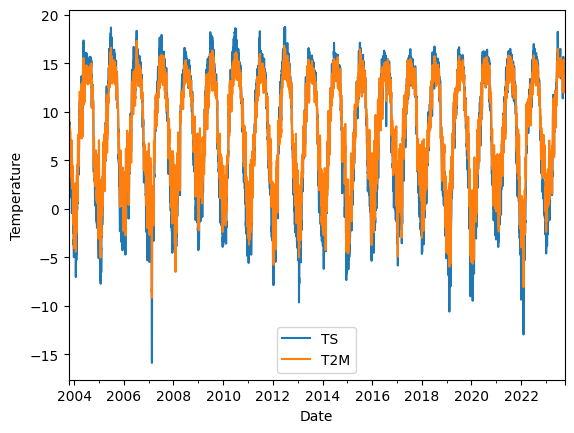

In [13]:
df[["TS","T2M"]].plot()
plt.ylabel("Temperature")
plt.show()

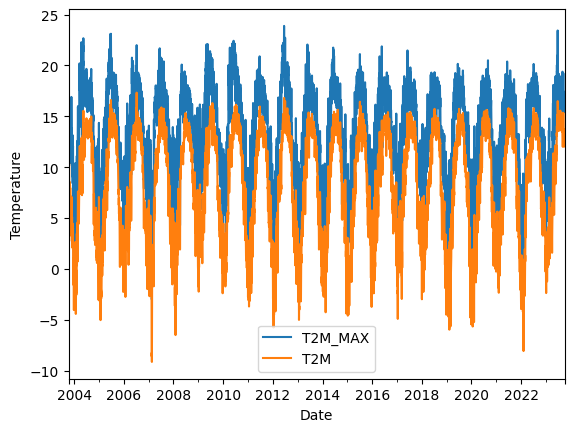

In [14]:
df[["T2M_MAX","T2M"]].plot()
plt.ylabel("Temperature")
plt.show()

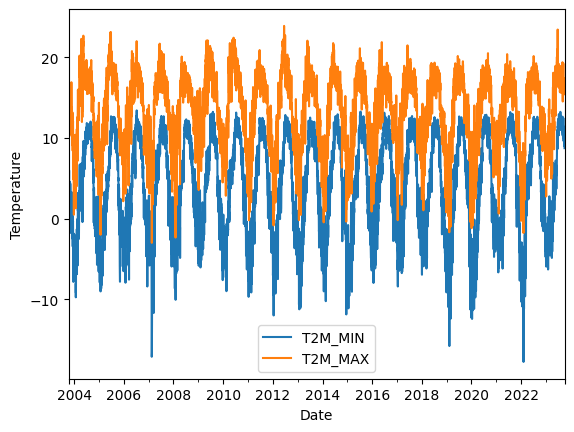

In [15]:
df[["T2M_MIN","T2M_MAX"]].plot()
plt.ylabel("Temperature")
plt.show()

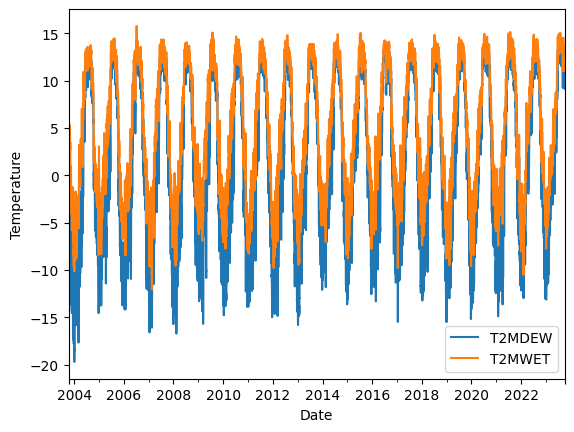

In [16]:
df[["T2MDEW","T2MWET"]].plot()
plt.ylabel("Temperature")
plt.show()

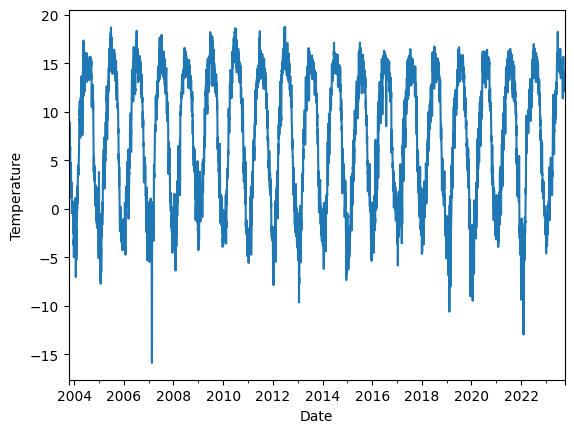

In [17]:
df["TS"].plot()
plt.ylabel("Temperature")
plt.show()

Arranging dataset with just TS and target values.

- df["target"] creates a new column target by shifting the rows upward and the last one becomes null, i.e the TS value of 2nd row is now the target value for the first row and simliarly for others.

In [18]:
df["target"]=df.shift(-1)["TS"]

- The last row now contains a null value in the target columns as we shifted all the TS values upwards in target row , so removing the last row and creating the copy in the same dataframe.
- .iloc[:-1,:] used to select all rows up to, but not including, the last row (hence the -1). The : in the second position indicates that you want to select all columns.

In [19]:
df=df.iloc[:-1,:].copy()

Selecting only TS column as feature.

- Selecting features and assigning it to predictors variable,

In [20]:
#predictors=["T2M","T2MDEW","T2MWET","TS","T2M_RANGE","T2M_MAX","T2M_MIN"]
predictors=["TS"]

Splitting dataset into training and testing set,
Training set data from 2003-10-10 to 2016-10-01
Testing set data from 2016-10-02 to 2023-09-30

- train=df.loc[:"2016-10-01"] is used to select all the rows from first to index 2016-10-01 and assign it to variable train.
- test_data=df.loc["2016-10-02":] is used to select all the rows from 2016-10-02 to the last row and assign it to variable test_data.
- Selecting data from training,
- x_train=train[predictors] , selects only values of TS to x_train variable
- y_train=train["target"] , selects only target variable and assigns it to y_train variable,

- And similar for test data,

In [21]:
train=df.loc[:"2016-10-01"]
test_data=df.loc["2016-10-02":]
x_train=train[predictors]
y_train=train["target"]
x_test=test_data[predictors]
y_test=test_data["target"]

In [22]:
x_test

,TS
Date,
2016-10-02,12.49
2016-10-03,11.59
2016-10-04,11.88
2016-10-05,11.62
2016-10-06,11.40
...,...
2023-09-26,12.30
2023-09-27,12.62
2023-09-28,12.60


Creating LSTM model using keras library from tensorflow, with 128 Neurons and 1 output, loss as mean squared error and optimizer Adam with learning rate 0.001

- lstm_model = keras.Sequential() is used to initialize aa sequential neural network model to the variable lstm_model.
- lstm_model.add(keras.layers.LSTM(128, input_shape=(x_train.shape[1], 1))) , adds an LSTM layer to your model with 128 LSTM units and an input shape of the number of samples and number to input variables.
- lstm_model.add(keras.layers.Dense(1)), This line adds a Dense layer to your LSTM model. The Dense layer is a fully connected layer, and in this case, it has a single unit (neuron) with a linear activation function.
- lstm_model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001)),  This line compiles the model by specifying the loss function and the optimizer.  It sets the Adam optimizer with a learning rate of 0.001.

In [23]:
lstm_model = keras.Sequential()
lstm_model.add(keras.layers.LSTM(128, input_shape=(x_train.shape[1], 1)))
lstm_model.add(keras.layers.Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

The EarlyStopping callback is a useful tool to prevent overfitting and save training time. It allows you to halt the training process when it appears that the model is no longer improving on the chosen metric.

- keras.callbacks.EarlyStopping: This creates an instance of the EarlyStopping callback provided by Keras. The EarlyStopping callback is used to monitor a specific metric during training and stop the training process early if certain criteria are met.
- monitor='loss': This specifies the metric that the callback should monitor to determine whether to stop training.
- patience=10: The patience parameter determines how many epochs the training is allowed to continue without improvement in the monitored metric.

In [24]:
callbacks=[keras.callbacks.EarlyStopping(monitor='loss', patience=10)]

Training the model for 200 epochs with batch size of 32.

- The created LSTM model will be trained for 200 epochs with the specified parameters, and the training history will be stored in the history variable for further analysis and visualization.
- The EarlyStopping callback will be used to potentially halt training early if the loss does not improve as expected.
- x_train and y_train are the training data,
- epochs=200: This parameter specifies the number of training epochs. An epoch is one complete pass through the entire training dataset.
- batch_size=32: This sets the batch size, which determines how many samples are used in each update of the model's weights. A batch size of 32 means that the model will update its weights after processing each batch of 32 samples.
- validation_data=(x_test, y_test): This parameter provides a validation dataset to evaluate the model's performance during training. The model will not be trained on the validation data; it is used to monitor how well the model generalizes to unseen data and can help detect overfitting.
- shuffle=False: When shuffle is set to False, it means that the training data won't be shuffled before each epoch.
- callbacks=callbacks: Here, you are passing the previously defined EarlyStopping callback to the callbacks parameter. This callback will monitor the training process and stop it if the loss does not improve for 10 consecutive epochs, as specified when you defined the callback.

In [25]:
history = lstm_model.fit(
    x_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(x_test,y_test),
    shuffle=False,
    callbacks=callbacks,
)

Epoch 1/200
149/149 [==============================] - 4s 8ms/step - loss: 45.5008 - val_loss: 6.4808
Epoch 2/200
149/149 [==============================] - 1s 5ms/step - loss: 3.1156 - val_loss: 2.2105
Epoch 3/200
149/149 [==============================] - 1s 5ms/step - loss: 1.9146 - val_loss: 1.7777
Epoch 4/200
149/149 [==============================] - 1s 5ms/step - loss: 1.5729 - val_loss: 1.5794
Epoch 5/200
149/149 [==============================] - 1s 5ms/step - loss: 1.4113 - val_loss: 1.4794
Epoch 6/200
149/149 [==============================] - 1s 5ms/step - loss: 1.3158 - val_loss: 1.3954
Epoch 7/200
149/149 [==============================] - 1s 5ms/step - loss: 1.2383 - val_loss: 1.3183
Epoch 8/200
149/149 [==============================] - 1s 5ms/step - loss: 1.1709 - val_loss: 1.2509
Epoch 9/200
149/149 [==============================] - 1s 5ms/step - loss: 1.1125 - val_loss: 1.1936
Epoch 10/200
149/149 [==============================] - 1s 4ms/step - loss: 1.0624 - val_l

In [26]:
# test_pred=lstm_model.evaluate(test[predictors])

Predicting values for the x_test values.

After executing this line of code, test_pred will contain the model's predictions for the test data.

In [27]:
test_pred=lstm_model.predict(x_test)

80/80 [==============================] - 1s 2ms/step


Reshaping the values to create a graph for actual and predicted values.
- The predicted values from the model are in 2D format, so converting them into 1D format for further analysis of actual and predicted values,
- .reshape function is used to reshape 2555,1 2D data to 2555 1D value.

In [28]:
print(test_pred.shape)
print(y_test.shape)
test_pred_reshaped = test_pred.reshape(2555,)

(2555, 1)
(2555,)


Creating a dataframe for the actual and predicted values for test data.
- The first line creates a new dataframe called combined that have the colums of actual target value of the dataset anad the predicted values from the models as actual and predictions.

In [29]:
combined=pd.concat([y_test,pd.Series(test_pred_reshaped,index=y_test.index)],axis=1)
combined.columns=["actual","predictions"]

Metrics results for LSTM model

- Geting metrics results using the imported functions from sklearn.metrics all , the metrics measures takes actual test value and predicted test values for metrics calculation.

In [30]:
print("Mean Absolute Error ",mean_absolute_error(y_test,test_pred_reshaped))
mse = mean_squared_error(y_test, test_pred_reshaped)
rmse = np.sqrt(mse)
print("Root Mean Square ",rmse)
r2score=r2_score(y_test,test_pred_reshaped)
print("R2 Score ",r2score)

Mean Absolute Error  0.7442754903714484
Root Mean Square  0.9996687701259404
R2 Score  0.9773674732249358


- This will plot the graph between actual temperature and predicted temperature from model temperature.

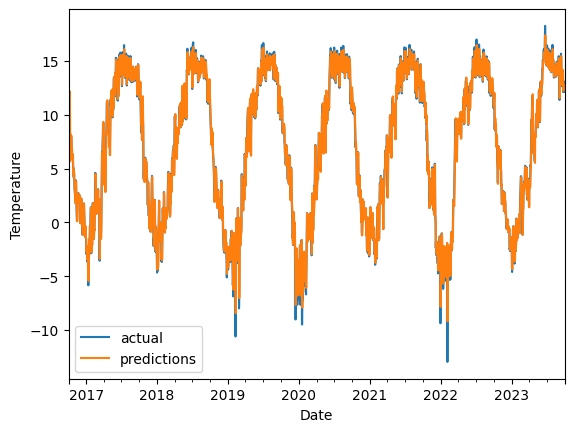

In [31]:
combined.plot()
plt.ylabel("Temperature")
plt.show()

- plt.plot(history.history['loss'], label='train'): This line plots the training loss over the epochs. history.history['loss'] is a list containing the training loss at each epoch, and it's labeled as 'train' in the plot.

- plt.plot(history.history['val_loss'], label='test'): This line plots the validation loss over the epochs. history.history['val_loss'] is a list containing the validation loss at each epoch, and it's labeled as 'test' in the plot.

- plt.legend(): This command adds a legend to the plot, displaying the labels 'train' and 'test' to differentiate between the training and validation loss curves.

- plt.xlabel('Epochs'): This sets the x-axis label of the plot to 'Epochs'.

- plt.ylabel('Loss'): This sets the y-axis label of the plot to 'Loss'.

- plt.show(): Finally, this command displays the plot.


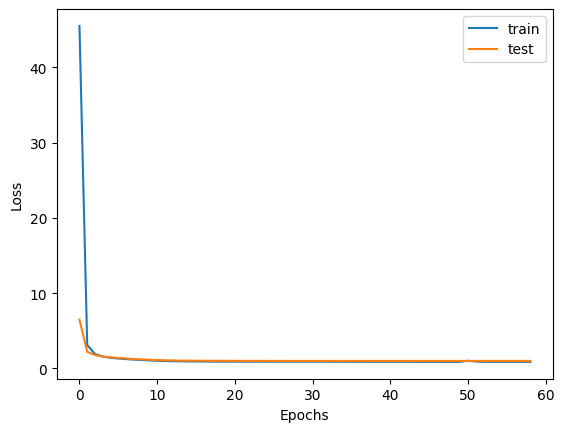

In [32]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Transformer Model


- ts_train = train['TS'].tolist(): This line extracts the 'TS' column from your train DataFrame and converts it into a Python list. ts_train now contains the time series data from your training set.

- ts_test = y_test.tolist(): This line extracts the time series data from your test set (y_test) and converts it into a Python list. It's assumed that y_test contains the target values for the test set.

- print("Training set has {} observations.".format(len(ts_train))): This line prints the number of observations in your training set. The len(ts_train) function call returns the length of the ts_train list, which corresponds to the number of observations in the training set.

- print("Test set has {} observations.".format(len(ts_test))): Similarly, this line prints the number of observations in your test set using the len(ts_test) function call.

In [33]:
ts_train = train['TS'].tolist()
ts_test = y_test.tolist()

print("Training set has {} observations.".format(len(ts_train)))
print("Test set has {} observations.".format(len(ts_test)))

Training set has 4741 observations.
Test set has 2555 observations.


- The to_sequences function takes linear time series data into an x and y where x is all possible sequences of seq_size. After each x sequence, this function places the next value into the y variable. These x and y data can train a time-series neural network.


- def to_sequences(seq_size, obs): This function takes two arguments: seq_size (sequence size) and obs (a time series or sequence of data).

- x = [] and y = []: Two empty lists, x and y, are initialized. These lists will be used to store input sequences and corresponding output sequences.

- The loop iterates through the time series data to create input-output pairs for sequences.

- for i in range(len(obs)-SEQUENCE_SIZE): It loops from 0 to (length of obs - SEQUENCE_SIZE).
- window = obs[i:(i+SEQUENCE_SIZE)] extracts a sequence of length SEQUENCE_SIZE starting at index i.
- after_window = obs[i+SEQUENCE_SIZE] gets the element immediately following the extracted sequence.
- window = [[x] for x in window] reshapes the extracted sequence into a list of lists, where each element of the sequence is in its own sublist.
- x.append(window) appends the input sequence to the x list.
- y.append(after_window) appends the element following the input sequence to the y list.
- The function returns the input sequences x and output sequences y as NumPy arrays.

- You then use this function to create sequences for both the training and testing data:

- x_train, y_train = to_sequences(SEQUENCE_SIZE, ts_test) creates sequences for training data.
- x_test, y_test = to_sequences(SEQUENCE_SIZE, ts_test) creates sequences for testing data.
The code then prints the shape of the training and test sets to verify the dimensions of the generated sequences.

- The purpose of creating these sequences is typically for training a neural network, such as an Transformer model , to perform sequence prediction or time series forecasting.
- The sequences provide the model with a history of data points to learn from and predict the next data point in the sequence.

In [34]:
def to_sequences(seq_size, obs):
    x = []
    y = []

    for i in range(len(obs)-SEQUENCE_SIZE):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)

    return np.array(x),np.array(y)


SEQUENCE_SIZE = 10
x_train,y_train = to_sequences(SEQUENCE_SIZE,ts_test)
x_test,y_test = to_sequences(SEQUENCE_SIZE,ts_test)

print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))

Shape of training set: (2545, 10, 1)
Shape of test set: (2545, 10, 1)


In [35]:
print(x_train.shape)
print(y_test.shape)

(2545, 10, 1)
(2545,)


Next, we create the transformer_encoder; I obtained this function from a Keras example. This layer includes residual connections, layer normalization, and dropout. This resulting layer can be stacked multiple times. We implement the projection layers with the Keras Conv1D.

- It implements a simplified version of a transformer encoder.
- Transformers are a type of neural network architecture primarily used for natural language processing and sequence-to-sequence tasks.

- inputs: This is the input tensor to the transformer encoder. It represents a sequence of data points and has a shape of (batch_size, sequence_length, input_dim). In the context of time series data, this would typically be a representation of a time series sequence.

- head_size: This parameter defines the dimensionality of the key and value vectors in the multi-head self-attention mechanism. It determines how many features each attention head processes.

- num_heads: The number of attention heads in the multi-head attention mechanism. Multiple heads allow the model to attend to different aspects of the input sequence.

- ff_dim: The dimensionality of the feed-forward network within each transformer block. This is typically a hyperparameter.

- dropout: A dropout rate to apply to the model. Dropout is used to prevent overfitting.

- Layer Normalization: It applies layer normalization to the input tensor. Layer normalization is a technique to normalize the input values to have zero mean and unit variance. This helps stabilize training.

- Multi-Head Self-Attention: It applies multi-head self-attention to the normalized input. The number of attention heads is specified by num_heads, and the key dimension is set to head_size.

- Dropout: Dropout is applied to the multi-head self-attention output to prevent overfitting.

- Residual Connection: The attention output is added back to the input tensor as a residual connection. This helps the model retain information from the original input.

- Feed-Forward Neural Network: The output from the residual connection is passed through a feed-forward neural network, which consists of two 1D convolutional layers. The first convolutional layer applies the ReLU activation function, and the second one does not apply an activation function.

- Residual Connection: Again, the output of the feed-forward network is added to the input tensor as a residual connection.

- The function effectively represents one transformer block within an encoder stack.

In [36]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

- The following function is provided to build the model, including the attention layer.
- build_model that constructs a neural network model based on the transformer architecture for a specific task.

- starts by defining the input layer with a shape of input_shape.

- It then applies a stack of num_transformer_blocks transformer encoder blocks. Each transformer block is generated by calling the transformer_encoder function you provided earlier.

- After all transformer blocks, it applies global average pooling to reduce the spatial dimensionality. This is common in text classification tasks using transformers.

- Following the pooling layer, the code applies one or more dense layers with ReLU activation and dropout to form an MLP.

- Finally, it adds an output layer with a single unit, which is typical for regression tasks where you want to predict a continuous value.

- The function returns a Keras Model with the specified architecture.

In [37]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

- This code creates a neural network model that leverages transformer architecture for time series regression and utilizes early stopping to prevent overfitting.
- input_shape = x_train.shape[1:]: This line determines the input shape based on the shape of the training data (x_train). It extracts the shape excluding the batch size dimension.

- model = build_model(...): Here, you create a model using the build_model function you defined earlier. You specify various hyperparameters such as head_size, num_heads, ff_dim, the number of transformer blocks, MLP units, and dropout rates.

- model.compile(...): This step compiles the model. It specifies the loss function as mean squared error ("mean_squared_error") and uses the Adam optimizer with a learning rate of 0.001. The model is now ready for training.

- callbacks: You define a list of callbacks, which includes early stopping with a patience of 10 and restoring the best weights when training stops early.

- history = model.fit(...): You train the model using the training data x_train and y_train. The training is done over 200 epochs, with a batch size of 32. You also use the early stopping callback to monitor the loss during training and stop if it doesn't improve for 10 consecutive epochs. The training history is stored in the history variable.

- model.evaluate(...): After training, you evaluate the model using the test data (x_test, y_test) and print the evaluation result. This line returns the evaluation metric (mean squared error) on the test data.

In [38]:
input_shape = x_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=0.001)
)
#model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history=model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

Epoch 1/200
64/64 [==============================] - 14s 97ms/step - loss: 8.9390 - val_loss: 1.9388
Epoch 2/200
64/64 [==============================] - 5s 75ms/step - loss: 4.6038 - val_loss: 1.0004
Epoch 3/200
64/64 [==============================] - 6s 88ms/step - loss: 3.5591 - val_loss: 1.0139
Epoch 4/200
64/64 [==============================] - 5s 72ms/step - loss: 3.0500 - val_loss: 0.9134
Epoch 5/200
64/64 [==============================] - 5s 76ms/step - loss: 2.8487 - val_loss: 0.9089
Epoch 6/200
64/64 [==============================] - 6s 90ms/step - loss: 2.6931 - val_loss: 0.7614
Epoch 7/200
64/64 [==============================] - 5s 71ms/step - loss: 2.5129 - val_loss: 0.7416
Epoch 8/200
64/64 [==============================] - 5s 84ms/step - loss: 2.4594 - val_loss: 0.7313
Epoch 9/200
64/64 [==============================] - 5s 76ms/step - loss: 2.4652 - val_loss: 0.6969
Epoch 10/200
64/64 [==============================] - 5s 71ms/step - loss: 2.2021 - val_loss: 0.809

0.9493507742881775

- After executing this line of code, test_pred2 variable will contain the model's predictions for the test data.

In [39]:
test_pred2=model.predict(x_test)

80/80 [==============================] - 2s 22ms/step


Reshaping the values to create a graph for actual and predicted values.

The predicted values from the model are in 2D format, so converting them into 1D format for further analysis of actual and predicted values,
.reshape function is used to reshape 2545,1 2D data to 2545 1D value. It's 2545 because of sequencing of 10  

In [40]:
print(test_pred2.shape)
test_pred_reshaped2 = test_pred2.reshape(2545,)

(2545, 1)


In [41]:
mean_absolute_error(y_test,test_pred_reshaped2)
# combined2=pd.concat([y_test,pd.Series(test_pred_reshaped2,index=y_test.index)],axis=1)
# combined2.columns=["actual","predictions"]

0.7360614971777311

In [42]:
print(mean_absolute_error(y_test,test_pred_reshaped2))

0.7360614971777311


In [43]:
print("Mean Absolute Error ",mean_absolute_error(y_test,test_pred_reshaped2))
mse = mean_squared_error(y_test, test_pred_reshaped2)
rmse = np.sqrt(mse)
print("Root Mean Square ",rmse)
r2score=r2_score(y_test,test_pred_reshaped2)
print("R2 Score ",r2score)

Mean Absolute Error  0.7360614971777311
Root Mean Square  0.9743463523005067
R2 Score  0.9785543841489082


In [44]:
y_test_df = pd.DataFrame(y_test, columns=["actual"])
test_pred_df = pd.DataFrame(test_pred_reshaped2, columns=["predictions"])
combined2 = pd.concat([y_test_df, test_pred_df], axis=1)

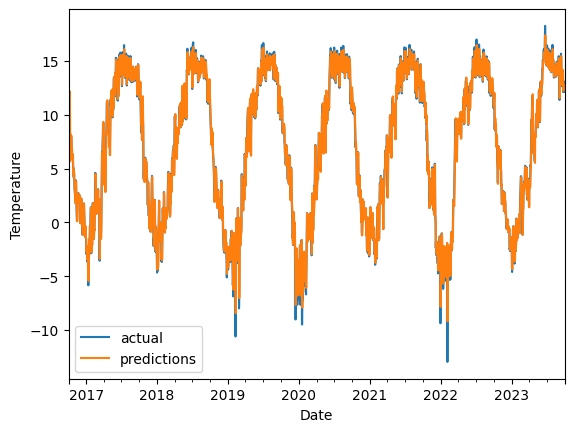

In [45]:
combined.plot()
plt.ylabel("Temperature")
plt.show()

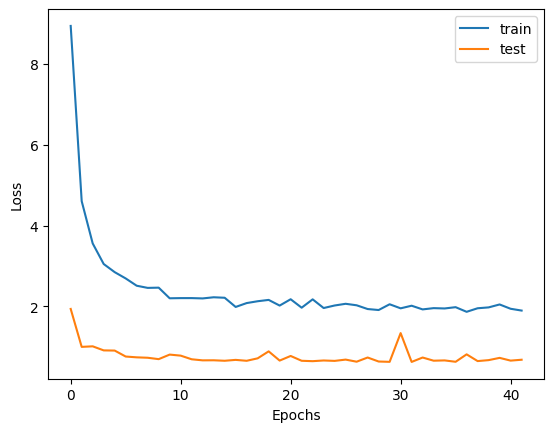

In [46]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()